Цель проекта: обнаружить какие параметры условий жизни учащихся влияют на их успеваемость по математике.

In [875]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from itertools import combinations
from scipy.stats import ttest_ind

In [876]:
pd.set_option('display.max_rows', 50) # показывать больше строк
pd.set_option('display.max_columns', 50) # показывать больше колонок

In [877]:
stud = pd.read_csv('stud_math.xls')

In [878]:
display(stud.head(10))
stud.info() 
stud.isnull().sum() # сколько пропущенных значений в каждой колонке

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,home,mother,2.0,2.0,0.0,yes,yes,no,no,yes,-6.0,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,NaN,NaN,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

school                  0
sex                     0
age                     0
address                17
famsize                27
Pstatus                45
Medu                    3
Fedu                   24
Mjob                   19
Fjob                   36
reason                 17
guardian               31
traveltime             28
studytime               7
failures               22
schoolsup               9
famsup                 39
paid                   40
activities             14
nursery                16
studytime, granular     7
higher                 20
internet               34
romantic               31
famrel                 27
freetime               11
goout                   8
health                 15
absences               12
score                   6
dtype: int64

В датасете 30 столбцов: 13 числовых, 17 строковых. Очень много пустых значений.

In [879]:
stud.columns = [i.lower() for i in stud.columns] # для удобства сделаю названия колонок с маленькой буквы

In [880]:
stud.corr() # проверю есть ли почти полностью скоррелированые колонки

,age,medu,fedu,traveltime,studytime,failures,"studytime, granular",famrel,freetime,goout,health,absences,score
age,1.000000,-0.161704,-0.138018,0.081508,-0.015556,0.228047,0.015556,0.068899,0.029023,0.135107,-0.065946,0.093592,-0.155726
medu,-0.161704,1.000000,0.275598,-0.173515,0.078589,-0.245463,-0.078589,-0.010050,0.025335,0.064164,-0.045051,-0.011944,0.213349
fedu,-0.138018,0.275598,1.000000,0.030646,0.057199,-0.150821,-0.057199,0.040577,-0.066556,-0.023282,0.027251,0.004695,0.078573
traveltime,0.081508,-0.173515,0.030646,1.000000,-0.102206,0.064699,0.102206,-0.016857,-0.021937,0.037636,-0.021531,-0.048215,-0.070559
studytime,-0.015556,0.078589,0.057199,-0.102206,1.000000,-0.178992,-1.000000,0.045894,-0.121969,-0.051280,-0.080016,-0.026544,0.115741
failures,0.228047,-0.245463,-0.150821,0.064699,-0.178992,1.000000,0.178992,-0.022655,0.098382,0.120914,0.081284,0.057391,-0.344338
"studytime, granular",0.015556,-0.078589,-0.057199,0.102206,-1.000000,0.178992,1.000000,-0.045894,0.121969,0.051280,0.080016,0.026544,-0.115741
famrel,0.068899,-0.010050,0.040577,-0.016857,0.045894,-0.022655,-0.045894,1.000000,0.175743,0.081154,0.077474,-0.082609,0.057112
freetime,0.029023,0.025335,-0.066556,-0.021937,-0.121969,0.098382,0.121969,0.175743,1.000000,0.296437,0.061575,0.009292,0.019026
goout,0.135107,0.064164,-0.023282,0.037636,-0.051280,0.120914,0.051280,0.081154,0.296437,1.000000,-0.015608,-0.048738,-0.129685


In [881]:
stud.drop(['studytime, granular'], inplace = True, axis = 1) # удалю колонку, так как она полностью скоррелирована с studytime

Просмотрю информацию в каждом из столбцов, чтобы найти возможные ошибки и попробовать заполнить пропуски.

school

In [882]:
display(pd.DataFrame(stud.school.value_counts()))

,school
GP,349
MS,46


В этом столбце нет пропусков. В датасете представлена информация об учениках всего двух школ. Большинство учеников из одной школы.

sex

In [883]:
display(pd.DataFrame(stud.sex.value_counts()))

,sex
F,208
M,187


В этом столбце нет пропусков. Девочек немного больше чем мальчиков.

age

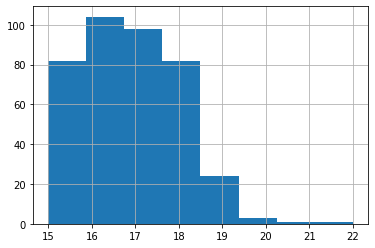

In [884]:
stud.age.hist(bins=8)

Этот столбец числовой и без пропусков. Возраст учеников от 15 до 22. Большинству учеников от 15 до 19 лет.

address

In [885]:
display(pd.DataFrame(stud.address.value_counts()))

,address
U,295
R,83


In [886]:
stud[(stud.school == 'MS')].address.value_counts() # сколько учеников из школы MS живут в городе и сколько за городом    

R    23
U    18
Name: address, dtype: int64

Большинство учеников живут в городе. Из-за похожего соотношения учеников по школам и месту жительства, я предположила, что ученики из школы MS живут за городом. Мое предположение не подтвердилось. 

famsize

In [887]:
display(pd.DataFrame(stud.famsize.value_counts()))

,famsize
GT3,261
LE3,107


У большинства учеников семья больше 3 человек.

pstatus

In [888]:
display(pd.DataFrame(stud.pstatus.value_counts()))

,pstatus
T,314
A,36


In [889]:
stud[(stud.famsize == 'GT3')].pstatus.value_counts() # у скольки учеников GT3 родители живут вместе и у скольки раздельно 

T    213
A     20
Name: pstatus, dtype: int64

У большинства учеников родители живут вместе. У меня есть предположение, что если размер семьи больше 3, то родители живут вместе. Похоже, что вероятность этого достаточно велика и можно заменить пропуски.

In [890]:
stud.loc[((stud['pstatus'].isnull()) & (stud['famsize'] == 'GT3')), 'pstatus'] = 'T' # если размер семьи > 3, вероятно родители живут вместе

medu

In [891]:
display(pd.DataFrame(stud.medu.value_counts()))

,medu
4.0,131
2.0,102
3.0,97
1.0,59
0.0,3


Большинство мам имеют высшее образование. 

In [892]:
display(pd.DataFrame(stud.fedu.value_counts()))

,fedu
2.0,106
3.0,96
4.0,88
1.0,78
0.0,2
40.0,1


Интересно, что пап имеющих высшее образование гораздо меньше, чем мам. У большинства 5-9 классов.
Очень мало родителей не имеющих образования. Видимо это данные об учениках из довольно развитой страны. 
Присутствует одно неправильное значение. Скорее всего опечатка.

In [893]:
stud.loc[(stud.fedu == 40.0), 'fedu'] = 4.0 # исправлю опечатку

mjob

In [894]:
display(pd.DataFrame(stud.mjob.value_counts()))

,mjob
other,133
services,98
at_home,58
teacher,55
health,32


fjob

In [895]:
display(pd.DataFrame(stud.fjob.value_counts()))

,fjob
other,197
services,102
teacher,29
at_home,16
health,15


In [896]:
stud[(stud.fjob == 'teacher')].fedu.value_counts() # какое образование имеют папы работющие учителями

4.0    25
3.0     1
Name: fedu, dtype: int64

Многие родители работают на госслужбе. 
Похоже, что родители работающие учителями имеют высшее образование. Можно заменить пропуски.

In [897]:
stud.loc[((stud['fedu'].isnull()) & (stud['fjob'] == 'teacher')), 'fedu'] = 4.0
stud.loc[((stud['medu'].isnull()) & (stud['mjob'] == 'teacher')), 'medu'] = 4.0

reason

In [898]:
display(pd.DataFrame(stud.reason.value_counts()))

,reason
course,137
home,104
reputation,103
other,34


Большинство выбрали школу из-за образовательной программы. Видимо в этой стрне не унифицированное образование и достаточный выбор школ. 

guardian

In [899]:
display(pd.DataFrame(stud.guardian.value_counts()))

,guardian
mother,250
father,86
other,28


У всех учеников (кроме строк с пропущеными значениями) обозначен опекун. Я не понимаю что это значит, тк у большинства учеников родители живут вместе.

traveltime

In [900]:
display(pd.DataFrame(stud.traveltime.value_counts()))

,traveltime
1.0,242
2.0,96
3.0,22
4.0,7


In [901]:
stud[(stud.reason == 'home')].traveltime.value_counts() # сколько времени добираются о школы, те кто выбрал причину - близость к дому

1.0    69
2.0    24
3.0     3
4.0     2
Name: traveltime, dtype: int64

Большинство учеников живут рядом со школой. 
Вероятно в пропущенных можно поставить значение <15 мин для тех, кто выбрал причиной близость школы к дому.

In [902]:
stud.loc[((stud['traveltime'].isnull()) & (stud['reason'] == 'home')), 'traveltime'] = 1.0 

studytime

In [903]:
display(pd.DataFrame(stud.studytime.value_counts()))

,studytime
2.0,194
1.0,103
3.0,64
4.0,27


Большинство учеников не тратят больше 5 часов в неделю на учебу помимо школы.

failures

In [904]:
display(pd.DataFrame(stud.failures.value_counts()))

,failures
0.0,293
1.0,49
2.0,16
3.0,15


Этот столбец довольно сильно скоррелирован со столбцом баллов по госэкзамену. Думаю он важен для анализа, но не вполне понимаю информацию, которая в нем содержится.

schoolsup

In [905]:
display(pd.DataFrame(stud.schoolsup.value_counts()))

,schoolsup
no,335
yes,51


У большинства учеников нет дополнительной образовательной поддержки.

famsup

In [906]:
display(pd.DataFrame(stud.famsup.value_counts()))

,famsup
yes,219
no,137


In [907]:
stud[(stud.famsup == 'no')].schoolsup.value_counts() # есть ли дополнительная обр. поддержка, у тех у кого нет семейной поддержки 

no     122
yes     11
Name: schoolsup, dtype: int64

У большинства учеников есть семейная образовательная поддержка. 
Похоже, что у тех у кого нет семейной поддержки, чаще нет и дополнительной образовательной поддержки. Можно заменить пропуски.

In [908]:
stud.loc[((stud['schoolsup'].isnull()) & (stud['famsup'] == 'no')), 'schoolsup'] = 'no'

paid

In [909]:
display(pd.DataFrame(stud.paid.value_counts()))

,paid
no,200
yes,155


У большинства учеников нет дополнительных платных занятий по математике.

activities

In [910]:
display(pd.DataFrame(stud.activities.value_counts()))

,activities
yes,195
no,186


Дополнительные внеучебные занятия есть у примерно половины учеников.

nursery

In [911]:
display(pd.DataFrame(stud.nursery.value_counts()))

,nursery
yes,300
no,79


Большинство учеников посещали детский сад.

higher

In [912]:
display(pd.DataFrame(stud.higher.value_counts()))

,higher
yes,356
no,19


Почти все ученики хотят получить высшее образование.

internet

In [913]:
display(pd.DataFrame(stud.internet.value_counts()))

,internet
yes,305
no,56


У большинства есть интернет.

romantic

In [914]:
display(pd.DataFrame(stud.romantic.value_counts()))

,romantic
no,240
yes,124


Большинство учеников не состоят в романтических отношениях.

famrel

In [915]:
display(pd.DataFrame(stud.famrel.value_counts()))

,famrel
4.0,182
5.0,99
3.0,62
2.0,17
1.0,7
-1.0,1


У большинства учеников хорошие семейные отношения.
Имеется одно отрицательное значение. Думаю это опечатка. 

In [916]:
stud.loc[(stud.famrel == -1.0), 'famrel'] = 1.0 # исправлю опечатку

freetime

In [917]:
display(pd.DataFrame(stud.freetime.value_counts()))

,freetime
3.0,153
4.0,112
2.0,63
5.0,38
1.0,18


В основном у учеников свободного времени после школы среднее количество.

goout

In [918]:
display(pd.DataFrame(stud.goout.value_counts()))

,goout
3.0,127
2.0,101
4.0,84
5.0,52
1.0,23


В основном ученики проводят среднее количество времени с друзьями.

health

In [919]:
display(pd.DataFrame(stud.health.value_counts()))

,health
5.0,138
3.0,89
4.0,63
1.0,47
2.0,43


У большинства хорошее состояние здоровья.

absences

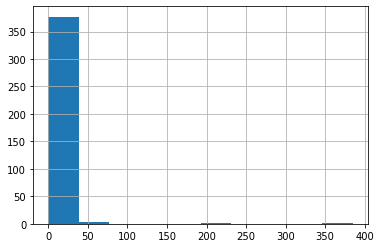

In [920]:
stud.absences.hist(bins=10)

Есть два странных значения. Удалю их.

In [921]:
stud = stud.query('absences != 385.0') 
stud = stud.query('absences != 212.0')

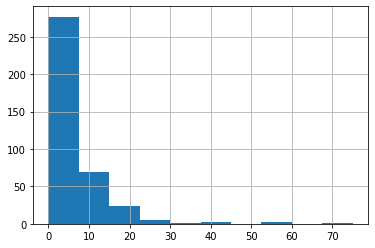

In [922]:
stud.absences.hist(bins=10)

Большинство учеников почти не пропускали занятия.

score

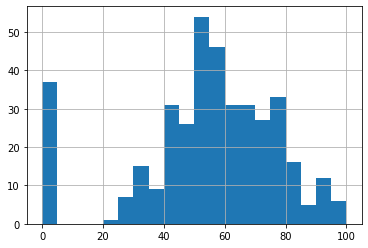

In [923]:
stud.score.hist(bins=20)

Это самый важный столбец, тк показывает успеваемость по математике. 
Здесь есть выброс с 0 значением. Хотя это целевая переменная, но я считаю, что его стоит удалить. Мало вероятно чтобы так много учеников написали на 0 баллов (на графике видно нормальное распределение баллов, за исключением 0 значения), гораздо более вероятно, что они вообще не писали экзамен, либо были выявлены какие-то нарушения. В таком случае невозможно узнать их успеваемость, и тогда 0 значение по смыслу здесь ближе к прощеннуму значению.

In [924]:
stud = stud.loc[stud.score > 0] 

В датасете в основном номинативные признаки - 19 стобцов, к ним относятся: school, sex, address, famsize, pstatus, medu, fedu, mjob, fjob, reason, guardian, schoolsup, famsup, paid, activities, nursery, higher, internet, romantic.
Есть 6 ранговых, это: traveltime, studytime, famrel, freetime, goout, health.
И всего 4 количественных: age, absences, score, failures. Насчет failures я не уверена.

In [925]:
#stud.dropna(axis=0) # удалю строки с пропусками

Если удалить все строки с пропусками останется всего 99 строк. Проанализирую оставшуюся информацию, чтобы найти и удалить совсем не влияющие на score показатели и восстановить часть строк.

In [926]:
def get_boxplot(column): 
    fig, ax = plt.subplots(figsize = (14, 4))
    sns.boxplot(x=column, y='score', 
                data=stud.loc[stud.loc[:, column].isin(stud.loc[:, column])],
               ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()

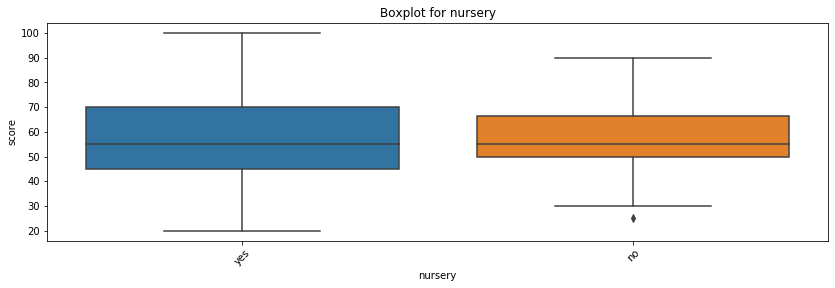

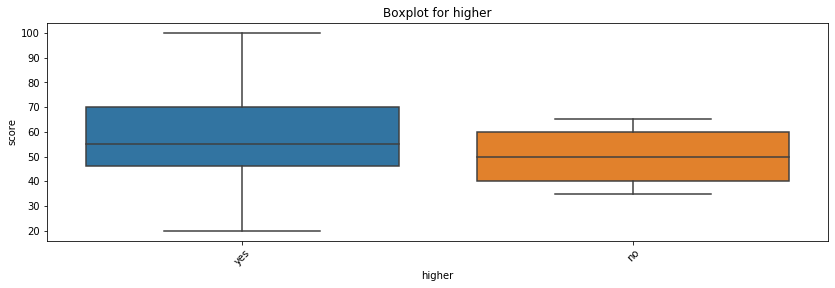

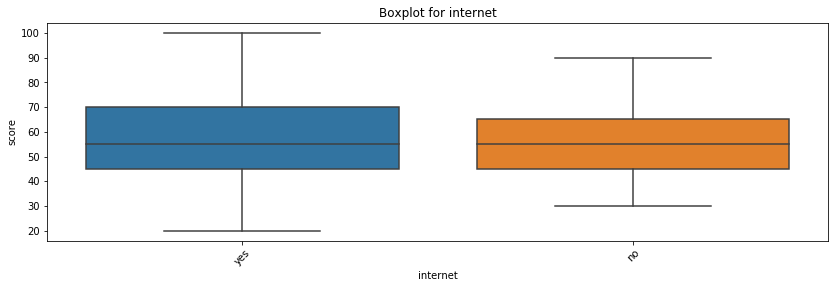

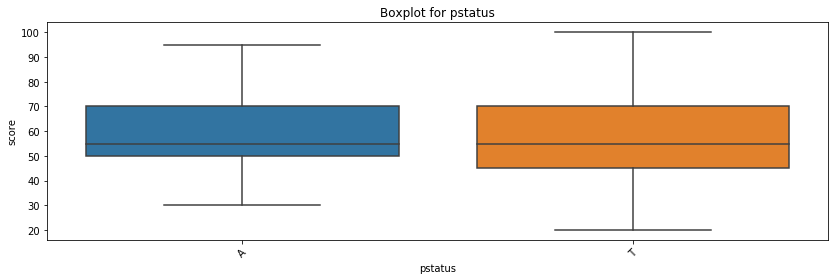

In [927]:
for col in ['nursery', 'higher', 'internet', 'pstatus']:
    get_boxplot(col)

Я предпологаю, что можно удалить стоблцы: nursery, higher, internet, pstatus по двум причинам: 1. очень большая разница между количеством зачений, одино из значений практически не представленно в датасете 2. на графике практически не видно какого либо различия между этими значениями. 

In [928]:
stud.drop(['nursery'], inplace = True, axis = 1)
stud.drop(['higher'], inplace = True, axis = 1)
stud.drop(['internet'], inplace = True, axis = 1)
stud.drop(['pstatus'], inplace = True, axis = 1)

In [929]:
stud = stud.dropna(axis=0) # удалю строки с пропусками

In [936]:
def get_stat_dif(column): # тест Стьюдента
    cols = stud.loc[:, column].value_counts().index[:10]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(stud.loc[stud.loc[:, column] == comb[0], 'score'], 
                        stud.loc[stud.loc[:, column] == comb[1], 'score']).pvalue \
            <= 0.05/len(combinations_all): # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break

In [937]:
for col in ['school', 'sex', 'address', 'famsize', 'medu', 'fedu', 'mjob', 'fjob', 'reason', 'guardian', 'traveltime', 'studytime', 'schoolsup', 'famsup', 'paid', 'activities', 'romantic', 'famrel', 'freetime', 'goout', 'health']:
    get_stat_dif(col)

Найдены статистически значимые различия для колонки sex
Найдены статистически значимые различия для колонки address
Найдены статистически значимые различия для колонки schoolsup
Найдены статистически значимые различия для колонки famsup


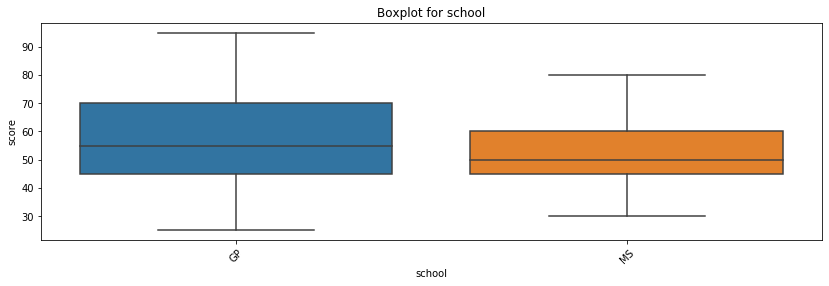

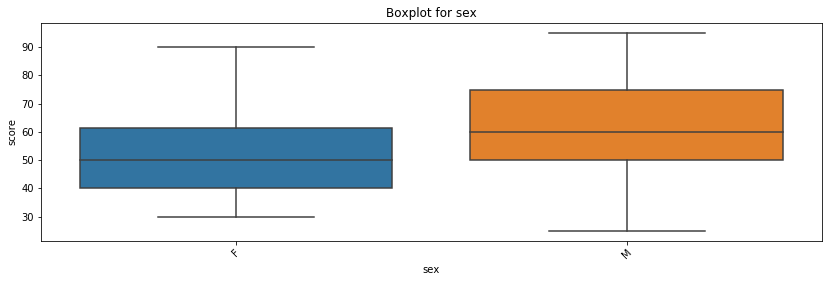

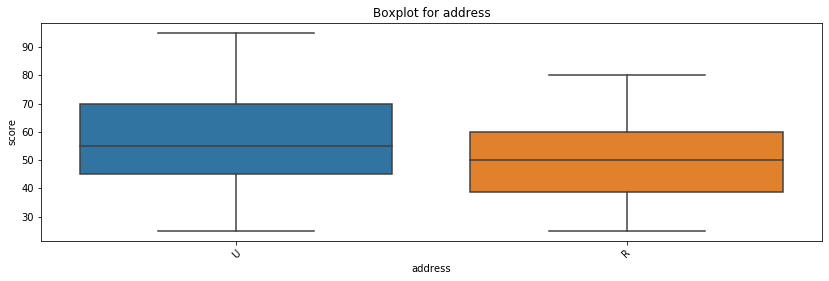

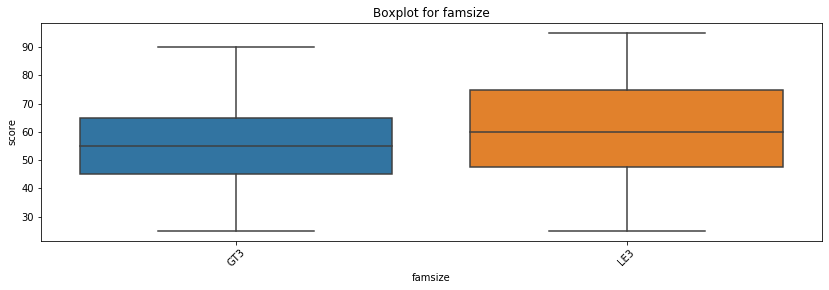

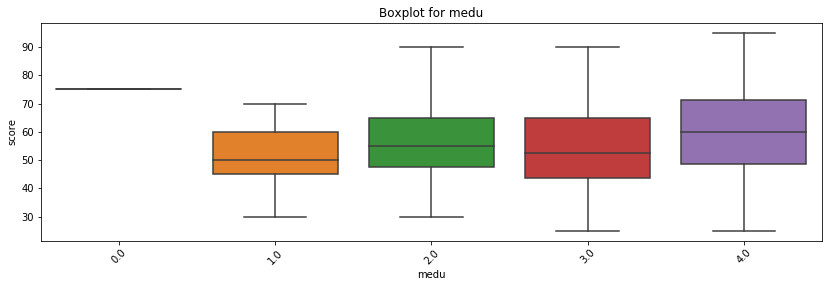

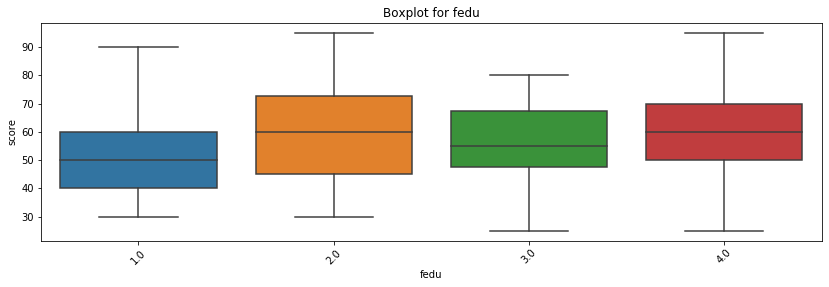

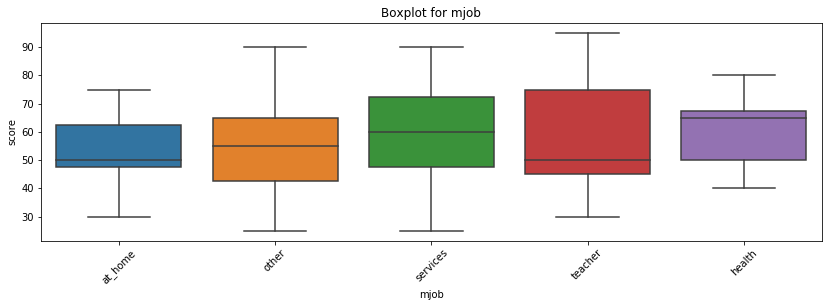

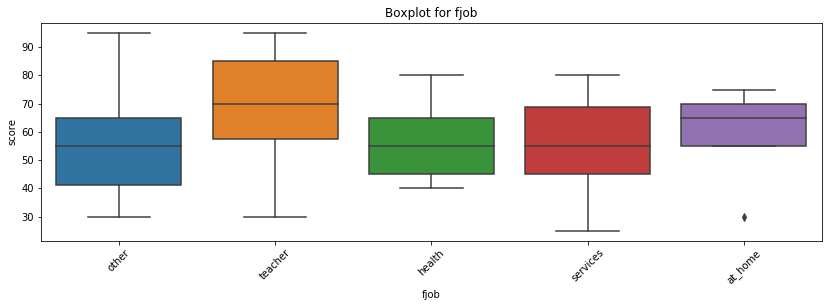

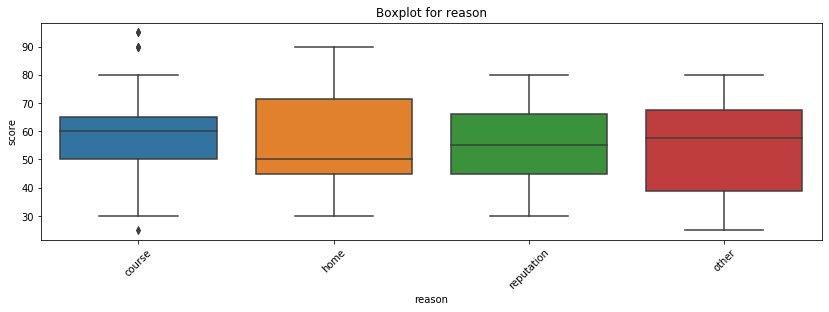

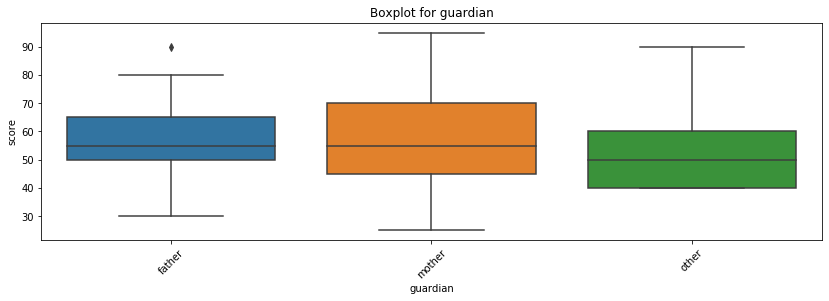

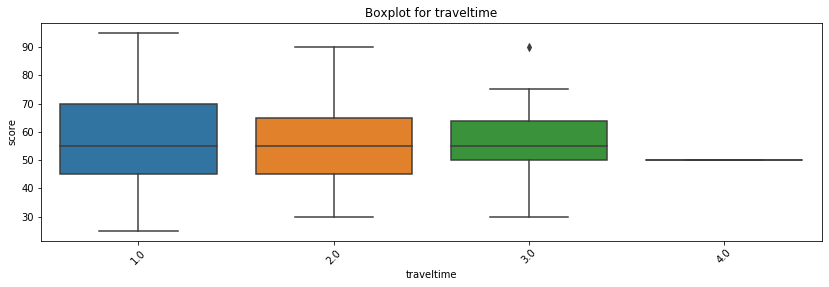

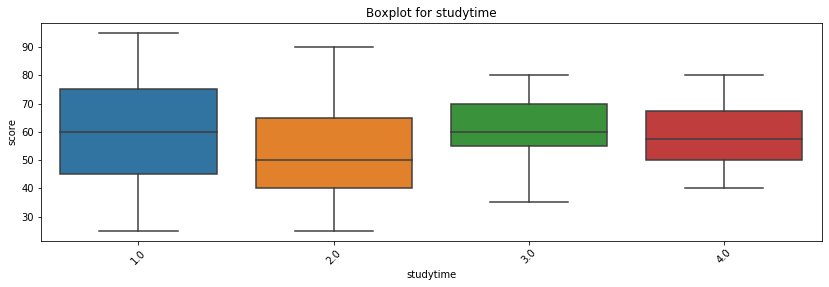

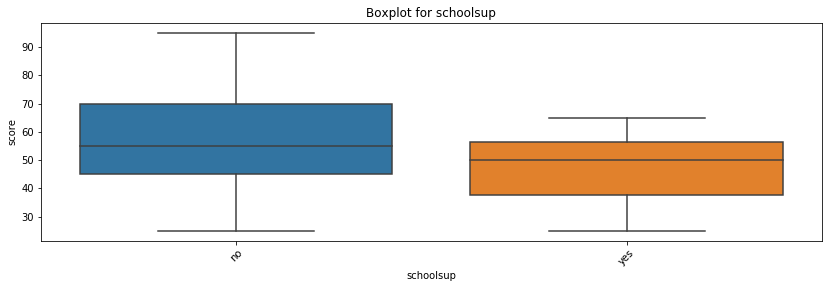

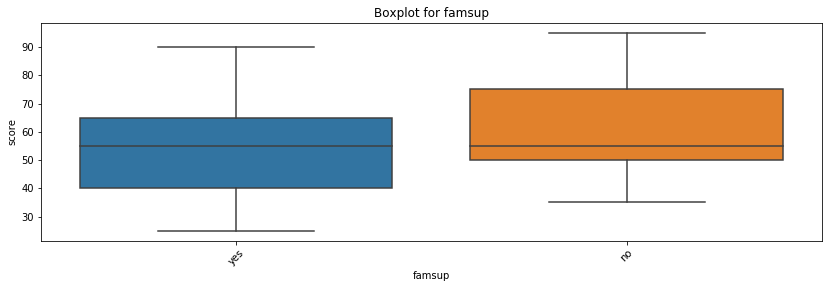

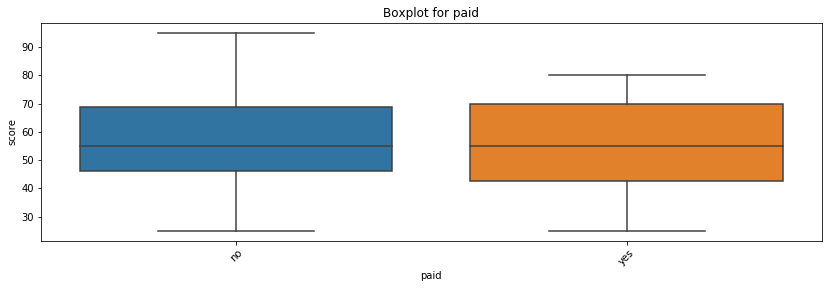

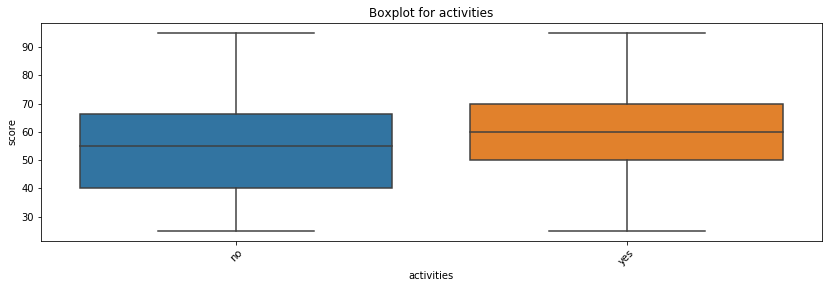

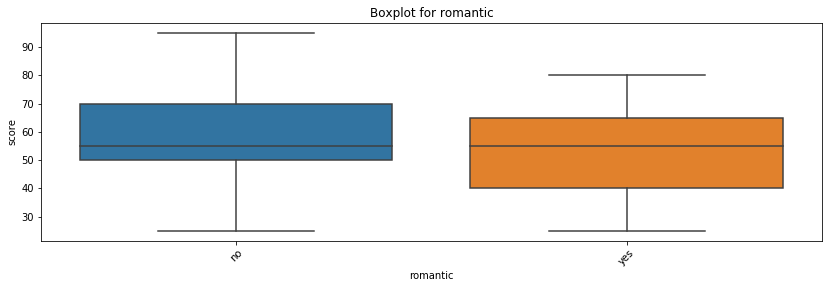

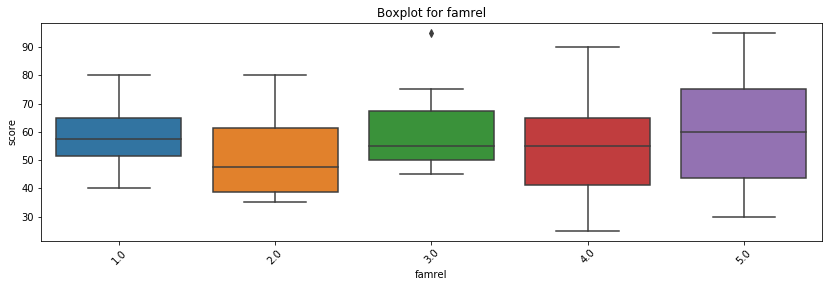

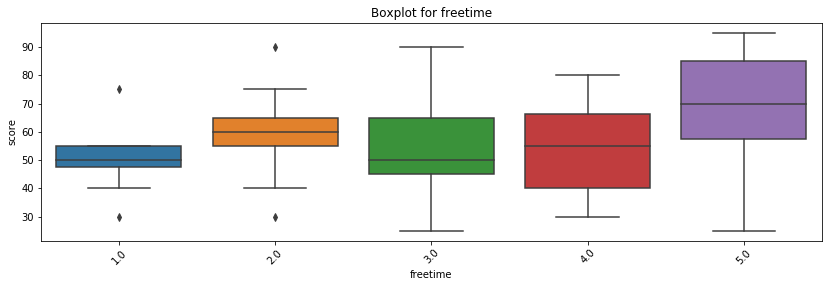

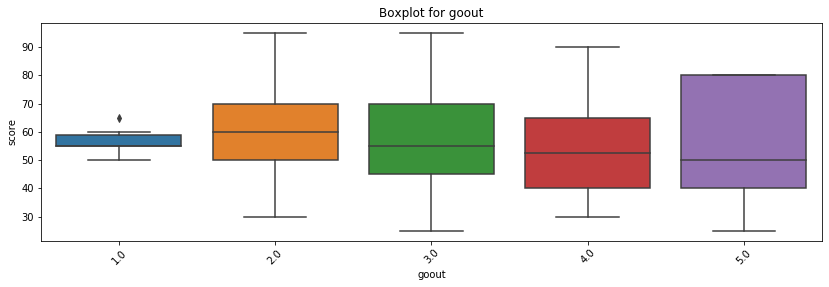

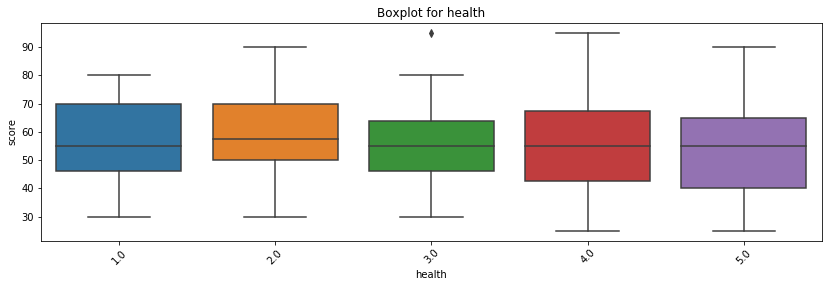

In [938]:
for col in ['school', 'sex', 'address', 'famsize', 'medu', 'fedu', 'mjob', 'fjob', 'reason', 'guardian', 'traveltime', 'studytime', 'schoolsup', 'famsup', 'paid', 'activities', 'romantic', 'famrel', 'freetime', 'goout', 'health']:
    get_boxplot(col)

In [939]:
stud.corr()

,age,medu,fedu,traveltime,studytime,failures,famrel,freetime,goout,health,absences,score
age,1.000000,-0.012071,-0.083983,0.058339,-0.085079,0.308481,0.062566,-0.015856,0.120501,-0.037507,0.208870,-0.186096
medu,-0.012071,1.000000,0.671596,-0.140501,-0.028453,-0.044285,-0.009431,0.017939,0.076302,-0.085907,0.163682,0.089560
fedu,-0.083983,0.671596,1.000000,-0.108463,-0.045468,-0.162889,-0.023527,-0.096500,-0.049333,0.073667,0.171957,0.104191
traveltime,0.058339,-0.140501,-0.108463,1.000000,-0.066862,-0.020363,-0.036390,-0.067145,-0.054177,0.102983,-0.099513,-0.053616
studytime,-0.085079,-0.028453,-0.045468,-0.066862,1.000000,-0.080871,0.073689,-0.215026,-0.084762,-0.141368,-0.062500,0.001390
failures,0.308481,-0.044285,-0.162889,-0.020363,-0.080871,1.000000,-0.178720,-0.026007,0.112345,0.056238,0.267303,-0.293415
famrel,0.062566,-0.009431,-0.023527,-0.036390,0.073689,-0.178720,1.000000,0.123392,0.072323,0.046679,0.014593,0.004608
freetime,-0.015856,0.017939,-0.096500,-0.067145,-0.215026,-0.026007,0.123392,1.000000,0.342328,0.067017,0.003208,0.138395
goout,0.120501,0.076302,-0.049333,-0.054177,-0.084762,0.112345,0.072323,0.342328,1.000000,-0.013637,0.106951,-0.121036
health,-0.037507,-0.085907,0.073667,0.102983,-0.141368,0.056238,0.046679,0.067017,-0.013637,1.000000,-0.081714,-0.035299


Итог: Из количественных переменных: age, absences, failures похоже, что все оказывают достаточное влияние на целевую переменную.
Тест Стьюдента нашел статистически значимые различия для четырех переменных: sex, address, schoolsup, famsup.
Но я бы оставила еще столбцы: mjob, fjob, freetime, тк по графикам кажется, что они тоже имеют значение.

In [940]:
stud_for_model = stud.loc[:, ['age', 'absences', 'failures', 'sex', 'address', 'schoolsup','famsup', 'mjob', 'fjob', 'freetime', 'score']]
stud_for_model

,age,absences,failures,sex,address,schoolsup,famsup,mjob,fjob,freetime,score
1,17,4.0,0.0,F,U,no,yes,at_home,other,3.0,30.0
4,16,4.0,0.0,F,U,no,yes,other,other,3.0,50.0
5,16,10.0,0.0,M,U,no,yes,services,other,4.0,75.0
7,17,6.0,0.0,F,U,yes,yes,other,teacher,1.0,30.0
10,15,0.0,0.0,F,U,no,yes,teacher,health,3.0,45.0
...,...,...,...,...,...,...,...,...,...,...,...
379,17,17.0,0.0,F,R,no,yes,at_home,other,5.0,50.0
381,18,5.0,0.0,M,R,no,no,other,other,4.0,35.0
386,18,7.0,0.0,F,R,no,yes,teacher,at_home,4.0,30.0
388,18,0.0,0.0,F,U,no,yes,teacher,services,3.0,40.0
